In [2]:
import pickle
from feature_extractor import FeatureExtractor
from sklearn.neighbors import NearestNeighbors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Loading stored features and filenames
filenames = pickle.load(open('data/filenames.pickle', 'rb'))
feature_list = pickle.load(open('data/features.pickle', 'rb'))

2022-04-25 10:14:26.470025: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-25 10:14:26.470055: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-25 10:14:27.999477: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-25 10:14:27.999509: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-25 10:14:27.999546: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (guts): /proc/driver/nvidia/version does not exist
2022-04-25 10:14:27.999725: I tensorflow/core/platform/cpu_feature_guard

Query Image Relative Path: 5.jpg


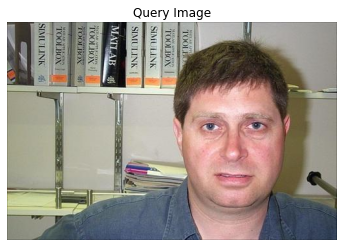

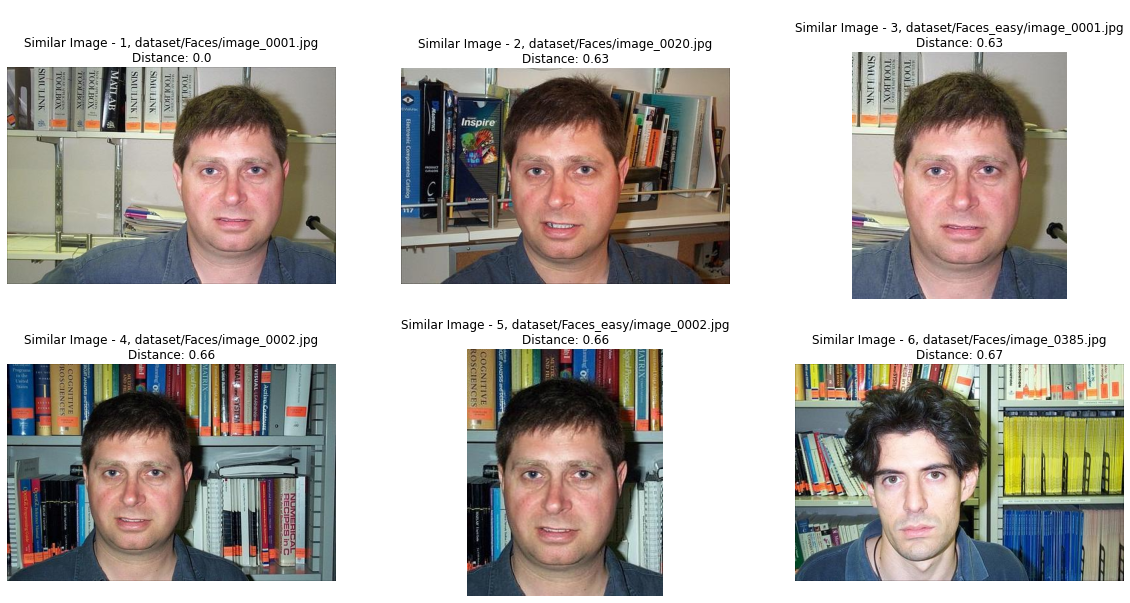

In [4]:
# Loading Query Image and Extracting Features
query_path = 'query/' + input("Query Image Relative Path: ")
query_feature = FeatureExtractor.extract(query_path)

# Searching
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([query_feature])

# Displaying Results
search_results = []
for i in range(0, 6):
    filePath = filenames[indices[0][i]]
    img = mpimg.imread(filePath)
    search_results.append(img)

query_img = mpimg.imread(query_path)
plt.axis('off')
plt.imshow(query_img)
plt.title("Query Image")
plt.show()

plt.figure(figsize=(20, 10))
columns = 3
for i, image in enumerate(search_results):
    ax = plt.subplot(2, columns, i + 1)
    ax.set_title("\nSimilar Image - " + str(i + 1) + ", " + filenames[indices[0][i]] 
                 + "\nDistance: " + str(float("{0:.2f}".format(distances[0][i]))))
    plt.axis('off')
    plt.imshow(image)
